In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# data = {}
# for person in range(1, 2):

subject001_experiment1_1 = pd.read_csv("arduino_person_001_exp_1_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject001_experiment2_1 = pd.read_csv("arduino_person_001_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject001_experiment2_2 = pd.read_csv("arduino_person_001_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

subject002_experiment1_1 = pd.read_csv("arduino_person_002_exp_1_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject002_experiment2_1 = pd.read_csv("arduino_person_002_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject002_experiment2_2 = pd.read_csv("arduino_person_002_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

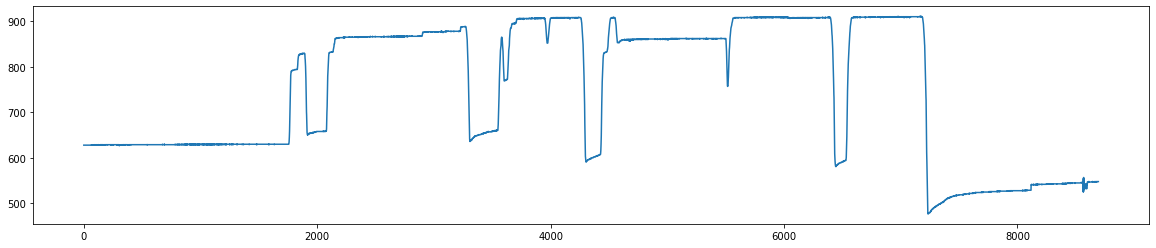

In [97]:
plt.figure(figsize=(20,4))
plt.plot(subject001_experiment2_1.loc[:, "force"])
plt.show()

In [73]:
subject001_experiment2_1[1768:1790]

,index,position,force,diff_lag15,is_climbing,climbing_group
0,1768,407,722.0,92.0,False,0
1,1769,406,739.0,109.0,True,1
2,1770,403,757.0,127.0,True,2
3,1771,402,766.0,136.0,True,3
4,1772,401,776.0,145.0,True,4
5,1773,400,781.0,148.0,True,5
6,1774,400,784.0,149.0,True,6
7,1775,400,787.0,148.0,True,7
8,1776,400,789.0,144.0,True,8
9,1777,400,789.0,138.0,True,9


In [107]:
subject001_experiment2_1["diff_lag15"] = subject001_experiment2_1["force"] - subject001_experiment2_1["force"].shift(15)
subject001_experiment2_1["is_changing"] = (subject001_experiment2_1["diff_lag15"] > 50) | (subject001_experiment2_1["diff_lag15"] < - 50)
subject001_experiment2_1["climbing_group"] = subject001_experiment2_1["is_changing"].cumsum()

by_climbing_group = subject001_experiment2_1.reset_index().groupby("climbing_group")["index"].agg(["min", "max", "count"])
by_climbing_group = by_climbing_group[(by_climbing_group["count"] > 400) & (by_climbing_group.index > 0) & (by_climbing_group.index < by_climbing_group.index.max())]


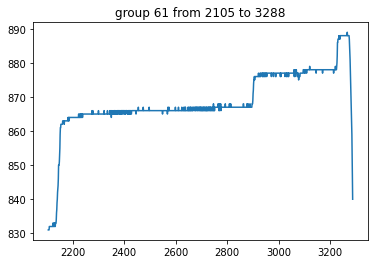

Segment average: 868.71. Std: 9.26


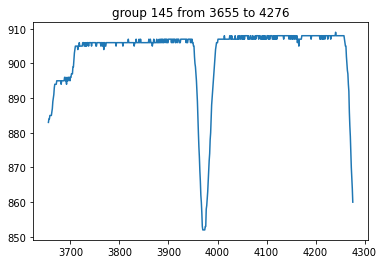

Segment average: 902.98. Std: 10.43


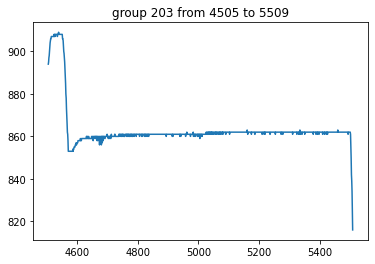

Segment average: 863.36. Std: 10.71


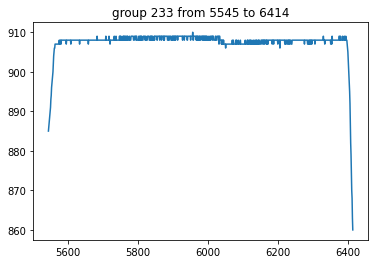

Segment average: 907.38. Std: 4.16


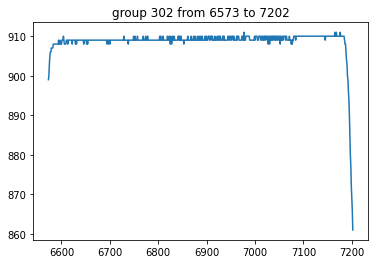

Segment average: 908.68. Std: 4.19


In [108]:
for group, row in by_climbing_group.iterrows():
    subset = subject001_experiment2_1.loc[row["min"]:row["max"]]
    plt.plot(subset["force"])
    plt.title(f"group {group} from {row['min']} to {row['max']}")
    plt.show()

    print(f"Segment average: {subset['force'].mean():.2f}. Std: {subset['force'].std():.2f}")

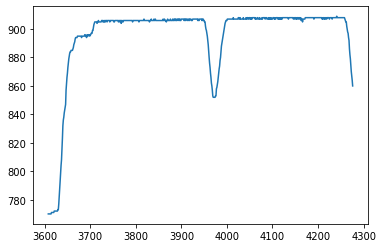

In [89]:
subset = subject001_experiment2_1.loc[3608:4276]
plt.plot(subset["force"])
plt.show()

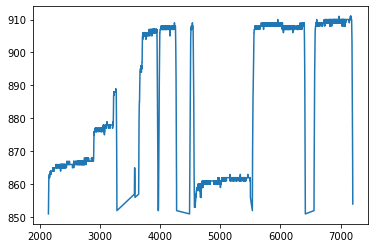

In [47]:
# data = []  # Create an empty list to store the filtered data

# for i in range(len(subject001_experiment2_1.index)):
#     if subject001_experiment2_1["force"][i] > 850:
#         data.append(subject001_experiment2_1["force"][i])  # Append the value to the list

plt.plot(subject001_experiment2_1.loc[subject001_experiment2_1["force"] > 850, "force"])
plt.show()

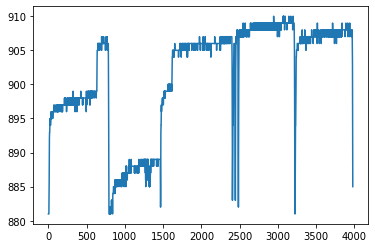

In [38]:
data = []  # Create an empty list to store the filtered data

for i in range(len(subject002_experiment2_1.index)):
    if subject002_experiment2_1["force"][i] > 880:
        data.append(subject002_experiment2_1["force"][i])  # Append the value to the list

plt.plot(data)
plt.show()

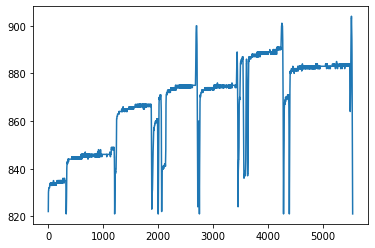

In [39]:
data = []  # Create an empty list to store the filtered data

for i in range(len(subject001_experiment2_2.index)):
    if subject001_experiment2_2["force"][i] > 820:
        data.append(subject001_experiment2_2["force"][i])  # Append the value to the list

plt.plot(data)
plt.show()

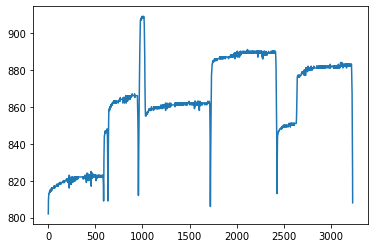

In [36]:
data = []  # Create an empty list to store the filtered data

for i in range(len(subject002_experiment2_2.index)):
    if subject002_experiment2_2["force"][i] > 800:
        data.append(subject002_experiment2_2["force"][i])  # Append the value to the list

plt.plot(data)
plt.show()

In [ ]:
max(experiment2_2["force"])

In [43]:
for i in range(len(subject001_experiment1_1.index)):
    if len(subject001_experiment1_1["position"][i]) < 3:
        data.append(subject001_experiment1_1["position"][i])  # Append the value to the list

plt.plot(subject001_experiment1_1["position"], subject001_experiment1_1["force"])

TypeError: object of type 'numpy.int64' has no len()

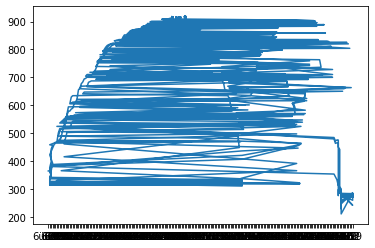

In [8]:
plt.plot(subject002_experiment1_1["position"], subject002_experiment1_1["force"])